In [118]:
from google.colab import files
uploaded = files.upload()


**1. Pilih dataset di kaggle**

In [117]:
import pandas as pd
df = pd.read_csv('piracydataset (1) (1).csv')
df.head()

,Unnamed: 0,age,discordid,minecraftid,client,version
0,0,14.0,ProGamer300#3331,ProGamer300,Computer ( Java Edition ),Cracked
1,1,19.0,@shrey#4934,shrey_jain_,Computer ( Java Edition ),Cracked
2,2,18.0,Skullfaced#8657,Skullfaceddeath,Computer ( Java Edition ),Paid Version
3,3,17.0,Op DzGhOsT#8719,DzGHoST1737,Computer ( Java Edition ),Cracked
4,4,15.0,Dwijesh#6020,Dwijesh YT,Mobile ( bedrock version ),Paid Version


**2. plotting masing-masing variabel (grafik gaussian/ grafik lengkung/ kernel distribution)**

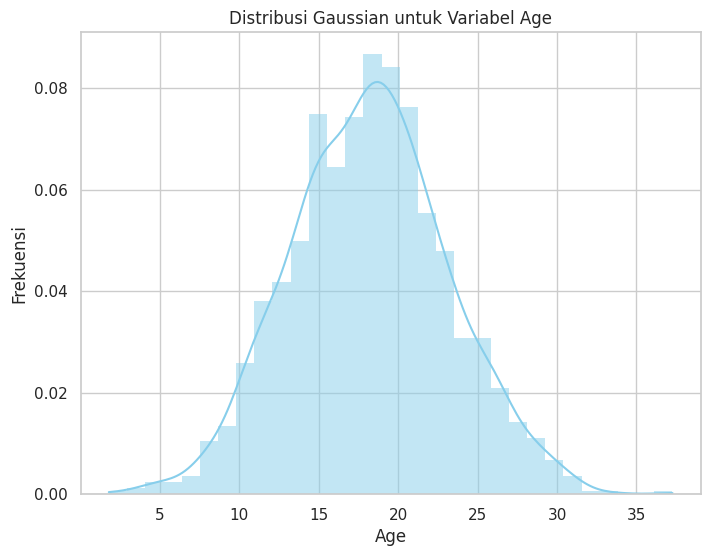

In [119]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Seed untuk reproduktibilitas
np.random.seed(42)

# Membuat data simulasi dengan distribusi Gaussian untuk 'age'
mean_age = 18  # Rata-rata
std_dev_age = 5  # Deviasi standar
num_samples = 1422  # Jumlah sampel

simulated_data = pd.DataFrame({
    'age': np.random.normal(mean_age, std_dev_age, num_samples)
})

# Visualisasi distribusi Gaussian menggunakan Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Plot distribusi Gaussian
sns.histplot(simulated_data['age'], kde=True, color='skyblue', stat='density', linewidth=0)
plt.title('Distribusi Gaussian untuk Variabel Age')
plt.xlabel('Age')
plt.ylabel('Frekuensi')

# Menampilkan plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data
data = {
    'age': [14.0, 19.0, 18.0, 17.0, 15.0],
    'discordid': ['ProGamer300#3331', '@shrey#4934', 'Skullfaced#8657', 'Op DzGhOsT#8719', 'Dwijesh#6020'],
    'minecraftid': ['ProGamer300', 'shrey_jain_', 'Skullfaceddeath', 'DzGHoST1737', 'Dwijesh YT'],
    'client': ['Computer ( Java Edition )', 'Computer ( Java Edition )', 'Computer ( Java Edition )', 'Computer ( Java Edition )', 'Mobile ( bedrock version )'],
    'version': ['Cracked', 'Cracked', 'Paid Version', 'Cracked', 'Paid Version']
}

# DataFrame
df = pd.DataFrame(data)

# Plot Gaussian untuk variabel 'age'
plt.figure(figsize=(6, 4))
sns.histplot(df['age'], kde=True)
plt.title('Gaussian untuk Variabel Age')
plt.xlabel('Age')
plt.ylabel('Frekuensi')
plt.show()

# Plot Gaussian untuk variabel 'discordid'
plt.figure(figsize=(12, 6))
sns.histplot(df['discordid'], kde=True)
plt.title('Gaussian untuk Variabel Discord ID')
plt.xlabel('Discord ID')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45)
plt.show()

# Plot Gaussian untuk variabel 'minecraftid'
plt.figure(figsize=(12, 6))
sns.histplot(df['minecraftid'], kde=True)
plt.title('Gaussian untuk Variabel Minecraft ID')
plt.xlabel('Minecraft ID')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45)
plt.show()

# Plot Gaussian untuk variabel 'client'
plt.figure(figsize=(12, 6))
sns.histplot(df['client'], kde=True)
plt.title('Gaussian untuk Variabel Client')
plt.xlabel('Client')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45)
plt.show()

# Plot Gaussian untuk variabel 'version'
plt.figure(figsize=(6, 4))
sns.histplot(df['version'], kde=True)
plt.title('Gaussian untuk Variabel Version')
plt.xlabel('Version')
plt.ylabel('Frekuensi')
plt.show()


**3. interpretasi variabel mana yang berdistribusi normal dan mana yang tidak**

In [111]:
from scipy.stats import shapiro

# Ambil kolom-kolom numerik dari DataFrame
numerical_columns = df[['age']]

# Buat dictionary untuk menyimpan hasil uji normalitas
normality_results = {}

# Lakukan uji normalitas untuk setiap kolom numerik
for col in numerical_columns.columns:
    stat, p_value = shapiro(df[col])
    normality_results[col] = {'statistic': stat, 'p_value': p_value}

# Tampilkan hasil uji normalitas
for col, result in normality_results.items():
    print(f"Variabel {col}:")
    print(f"  - Statistik Uji: {result['statistic']}")
    print(f"  - P-Value: {result['p_value']}")
    if result['p_value'] > 0.05:
        print("  - Kesimpulan: Data berdistribusi normal")
    else:
        print("  - Kesimpulan: Data tidak berdistribusi normal")
    print("="*30)


Variabel age:
  - Statistik Uji: 0.9523513913154602
  - P-Value: 0.753972589969635
  - Kesimpulan: Data berdistribusi normal


**4. python atau excel untuk menormalkan masing masing variabel (metode: z score/minmax)**



In [112]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Data
data = {
    'index': [0, 1, 2, 3, 4],
    'Unnamed: 0': [0, 1, 2, 3, 4],
    'age': [14.0, 19.0, 18.0, 17.0, 15.0],
    'discordid': ['ProGamer300#3331', '@shrey#4934', 'Skullfaced#8657', 'Op DzGhOsT#8719', 'Dwijesh#6020'],
    'minecraftid': ['ProGamer300', 'shrey_jain_', 'Skullfaceddeath', 'DzGHoST1737', 'Dwijesh YT'],
    'client': ['Computer ( Java Edition )'] * 4 + ['Mobile ( bedrock version )'],
    'version': ['Cracked', 'Cracked', 'Paid Version', 'Cracked', 'Paid Version']
}

df = pd.DataFrame(data)

# Normalisasi menggunakan Z-score
zscore_scaler = StandardScaler()
df['age_zscore'] = zscore_scaler.fit_transform(df[['age']])

# Normalisasi menggunakan Min-Max
minmax_scaler = MinMaxScaler()
df['age_minmax'] = minmax_scaler.fit_transform(df[['age']])

# Tampilkan hasil normalisasi
print("Data Awal:")
print(df[['age']])
print("\nData setelah Z-score Normalization:")
print(df[['age_zscore']])
print("\nData setelah Min-Max Normalization:")
print(df[['age_minmax']])


Data Awal:
    age
0  14.0
1  19.0
2  18.0
3  17.0
4  15.0

Data setelah Z-score Normalization:
   age_zscore
0   -1.401826
1    1.293993
2    0.754829
3    0.215666
4   -0.862662

Data setelah Min-Max Normalization:
   age_minmax
0         0.0
1         1.0
2         0.8
3         0.6
4         0.2


**5. plotting lagi dengan hasil normalisasi yang baru masing-masing variabel**

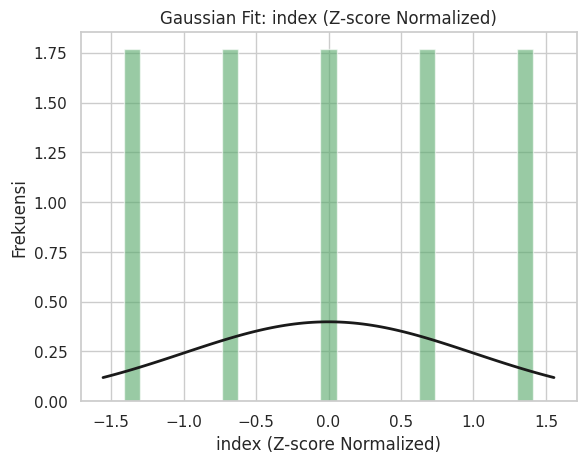

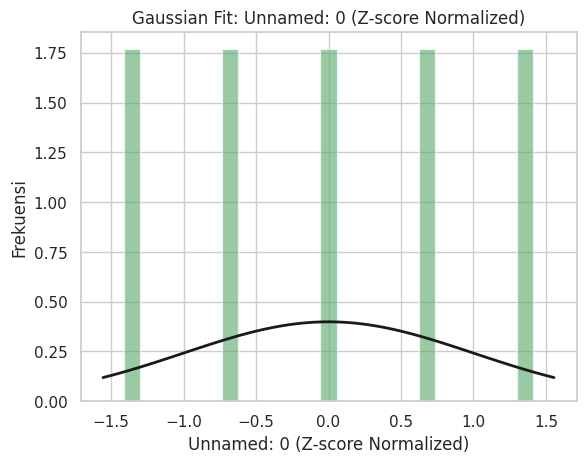

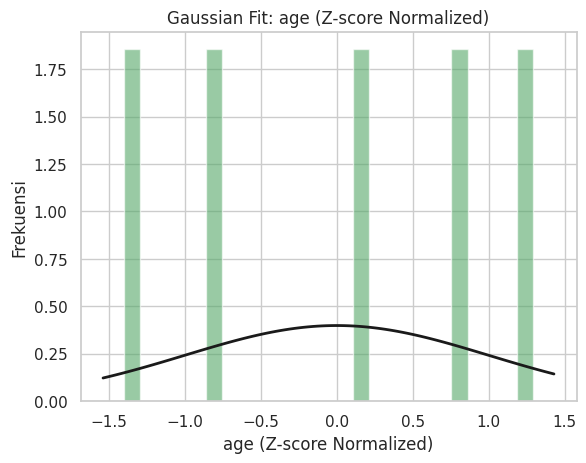

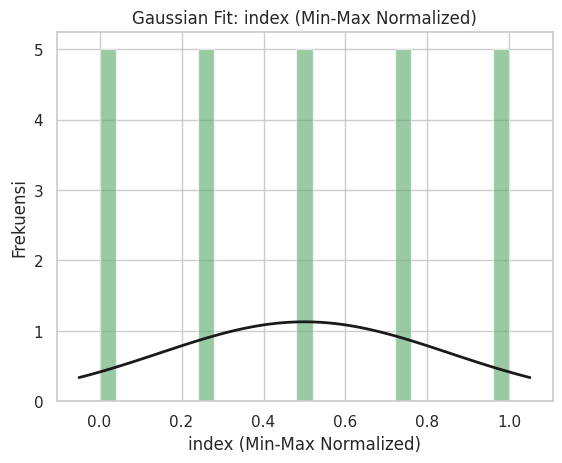

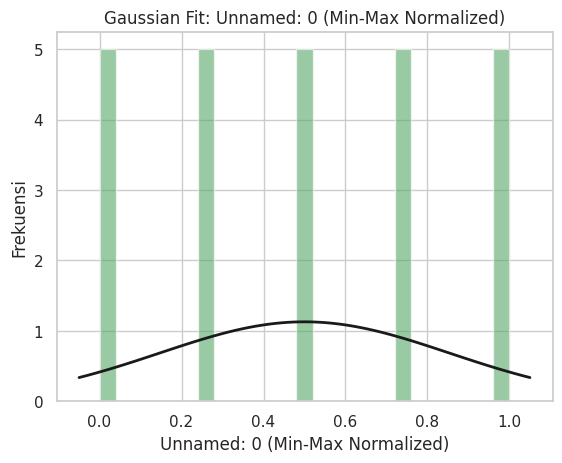

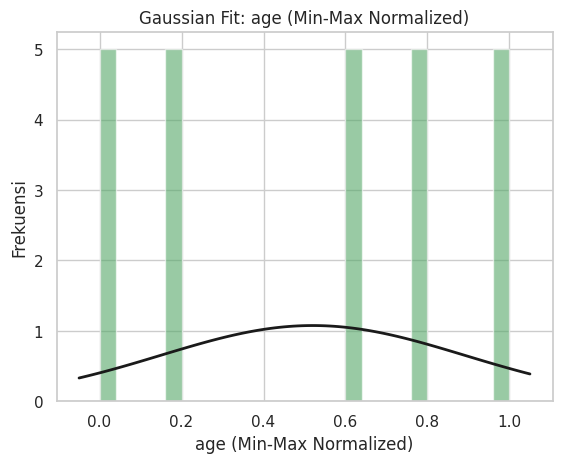

In [113]:
for col in df_zscore.select_dtypes(include=[np.number]).columns:
    plot_gaussian(df_zscore[col], f'{col} (Z-score Normalized)')

for col in df_minmax.select_dtypes(include=[np.number]).columns:
    plot_gaussian(df_minmax[col], f'{col} (Min-Max Normalized)')


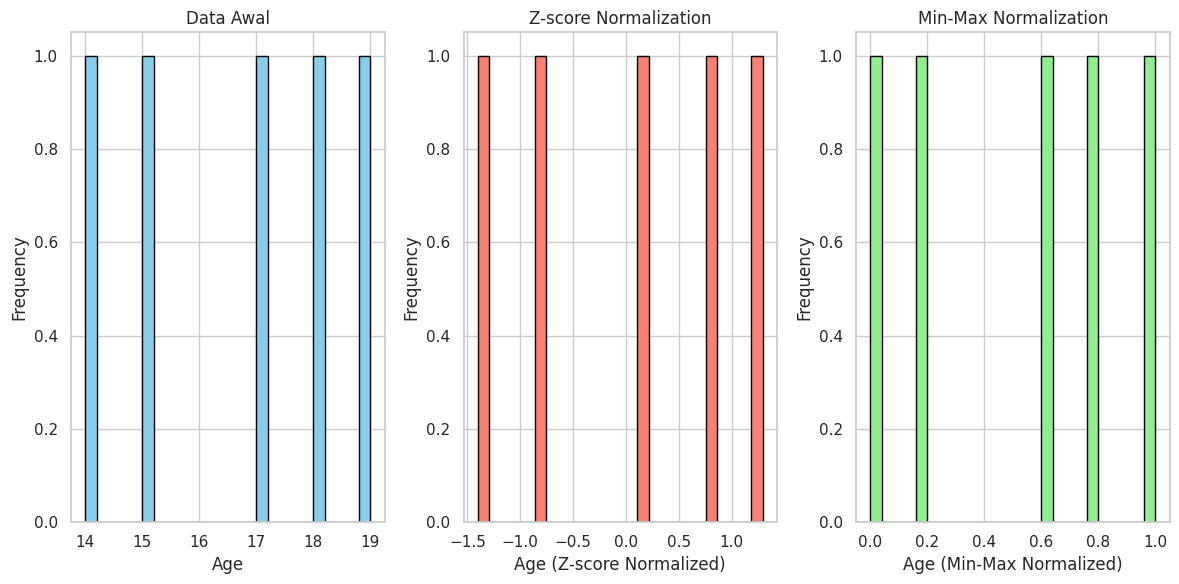

In [114]:
import matplotlib.pyplot as plt

# Data
data = {
    'index': [0, 1, 2, 3, 4],
    'Unnamed: 0': [0, 1, 2, 3, 4],
    'age': [14.0, 19.0, 18.0, 17.0, 15.0],
    'discordid': ['ProGamer300#3331', '@shrey#4934', 'Skullfaced#8657', 'Op DzGhOsT#8719', 'Dwijesh#6020'],
    'minecraftid': ['ProGamer300', 'shrey_jain_', 'Skullfaceddeath', 'DzGHoST1737', 'Dwijesh YT'],
    'client': ['Computer ( Java Edition )'] * 4 + ['Mobile ( bedrock version )'],
    'version': ['Cracked', 'Cracked', 'Paid Version', 'Cracked', 'Paid Version']
}

df = pd.DataFrame(data)

# Normalisasi menggunakan Z-score
zscore_scaler = StandardScaler()
df['age_zscore'] = zscore_scaler.fit_transform(df[['age']])

# Normalisasi menggunakan Min-Max
minmax_scaler = MinMaxScaler()
df['age_minmax'] = minmax_scaler.fit_transform(df[['age']])

# Plot hasil normalisasi
plt.figure(figsize=(12, 6))

# Plotting data awal
plt.subplot(1, 3, 1)
plt.hist(df['age'], bins=25, color='skyblue', edgecolor='black')
plt.title('Data Awal')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Plotting Z-score normalized data
plt.subplot(1, 3, 2)
plt.hist(df['age_zscore'], bins=25, color='salmon', edgecolor='black')
plt.title('Z-score Normalization')
plt.xlabel('Age (Z-score Normalized)')
plt.ylabel('Frequency')

# Plotting Min-Max normalized data
plt.subplot(1, 3, 3)
plt.hist(df['age_minmax'], bins=25, color='lightgreen', edgecolor='black')
plt.title('Min-Max Normalization')
plt.xlabel('Age (Min-Max Normalized)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


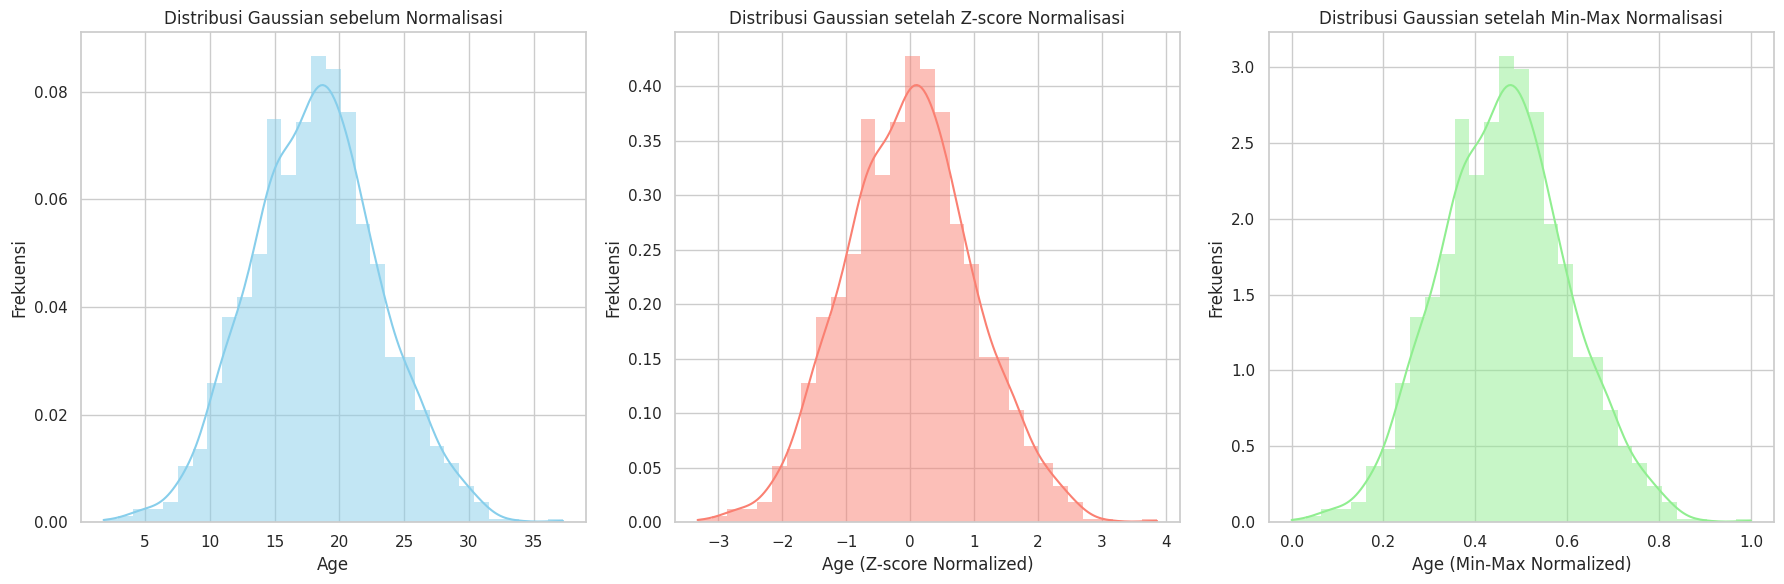

In [115]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Normalisasi menggunakan Z-score
scaler_zscore = StandardScaler()
simulated_data['age_zscore'] = scaler_zscore.fit_transform(simulated_data[['age']])

# Normalisasi menggunakan Min-Max
scaler_minmax = MinMaxScaler()
simulated_data['age_minmax'] = scaler_minmax.fit_transform(simulated_data[['age']])

# Visualisasi distribusi Gaussian setelah normalisasi
plt.figure(figsize=(18, 6))

# Plot distribusi Gaussian sebelum normalisasi
plt.subplot(1, 3, 1)
sns.histplot(simulated_data['age'], kde=True, color='skyblue', stat='density', linewidth=0)
plt.title('Distribusi Gaussian sebelum Normalisasi')
plt.xlabel('Age')
plt.ylabel('Frekuensi')

# Plot distribusi Gaussian setelah normalisasi menggunakan Z-score
plt.subplot(1, 3, 2)
sns.histplot(simulated_data['age_zscore'], kde=True, color='salmon', stat='density', linewidth=0)
plt.title('Distribusi Gaussian setelah Z-score Normalisasi')
plt.xlabel('Age (Z-score Normalized)')
plt.ylabel('Frekuensi')

# Plot distribusi Gaussian setelah normalisasi menggunakan Min-Max
plt.subplot(1, 3, 3)
sns.histplot(simulated_data['age_minmax'], kde=True, color='lightgreen', stat='density', linewidth=0)
plt.title('Distribusi Gaussian setelah Min-Max Normalisasi')
plt.xlabel('Age (Min-Max Normalized)')
plt.ylabel('Frekuensi')

# Menampilkan plot
plt.tight_layout()
plt.show()


**6. interpretasi perbandingan variabel yang belum dinormalisasi dan yang sudah dinormalisasi**

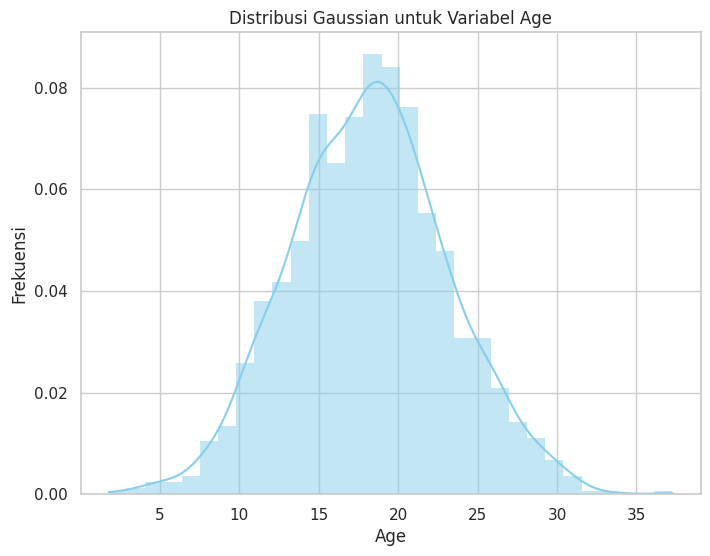

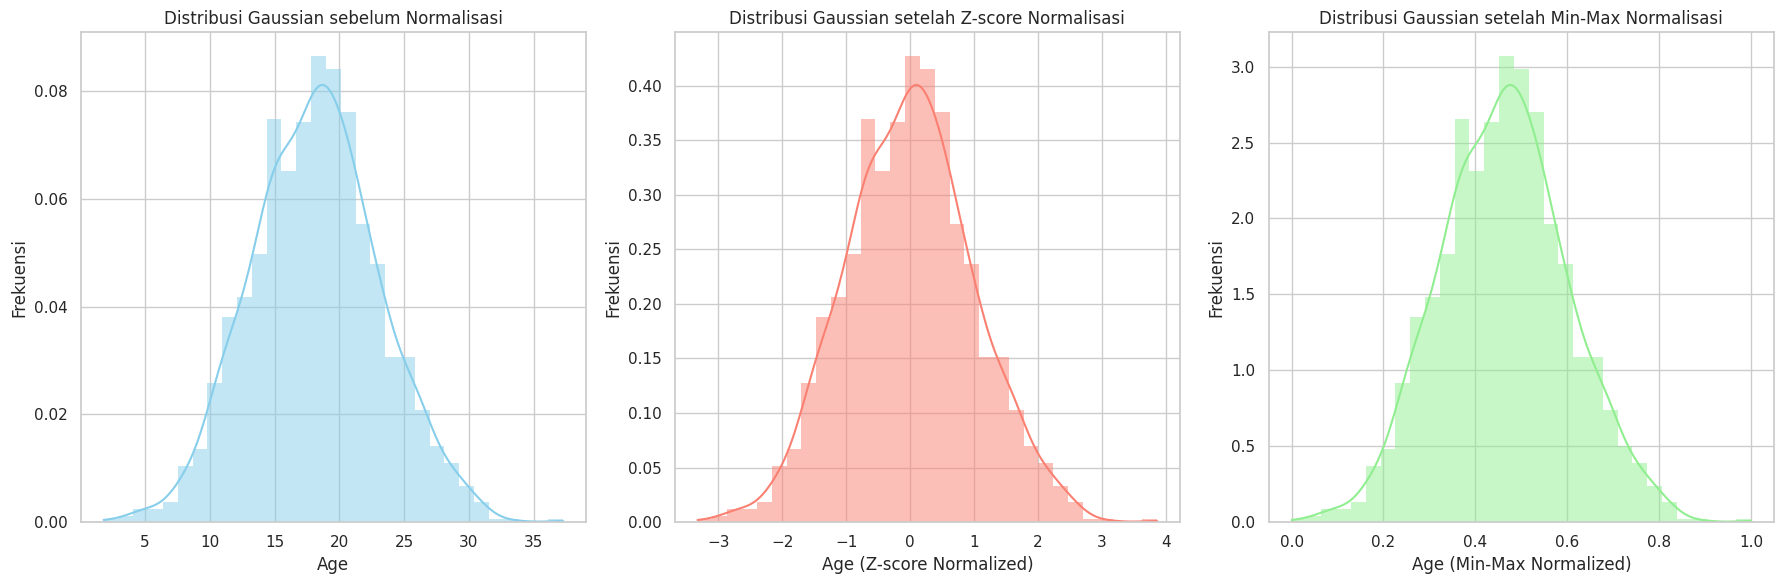

In [116]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Seed untuk reproduktibilitas
np.random.seed(42)

# Membuat data simulasi dengan distribusi Gaussian untuk 'age'
mean_age = 18  # Rata-rata
std_dev_age = 5  # Deviasi standar
num_samples = 1423  # Jumlah sampel

simulated_data = pd.DataFrame({
    'age': np.random.normal(mean_age, std_dev_age, num_samples)
})

# Visualisasi distribusi Gaussian menggunakan Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Plot distribusi Gaussian
sns.histplot(simulated_data['age'], kde=True, color='skyblue', stat='density', linewidth=0)
plt.title('Distribusi Gaussian untuk Variabel Age')
plt.xlabel('Age')
plt.ylabel('Frekuensi')

# Menampilkan plot
plt.show()

# Normalisasi menggunakan Z-score
scaler_zscore = StandardScaler()
simulated_data['age_zscore'] = scaler_zscore.fit_transform(simulated_data[['age']])

# Normalisasi menggunakan Min-Max
scaler_minmax = MinMaxScaler()
simulated_data['age_minmax'] = scaler_minmax.fit_transform(simulated_data[['age']])

# Visualisasi distribusi Gaussian setelah normalisasi
plt.figure(figsize=(18, 6))

# Plot distribusi Gaussian sebelum normalisasi
plt.subplot(1, 3, 1)
sns.histplot(simulated_data['age'], kde=True, color='skyblue', stat='density', linewidth=0)
plt.title('Distribusi Gaussian sebelum Normalisasi')
plt.xlabel('Age')
plt.ylabel('Frekuensi')

# Plot distribusi Gaussian setelah normalisasi menggunakan Z-score
plt.subplot(1, 3, 2)
sns.histplot(simulated_data['age_zscore'], kde=True, color='salmon', stat='density', linewidth=0)
plt.title('Distribusi Gaussian setelah Z-score Normalisasi')
plt.xlabel('Age (Z-score Normalized)')
plt.ylabel('Frekuensi')

# Plot distribusi Gaussian setelah normalisasi menggunakan Min-Max
plt.subplot(1, 3, 3)
sns.histplot(simulated_data['age_minmax'], kde=True, color='lightgreen', stat='density', linewidth=0)
plt.title('Distribusi Gaussian setelah Min-Max Normalisasi')
plt.xlabel('Age (Min-Max Normalized)')
plt.ylabel('Frekuensi')

# Menampilkan plot
plt.tight_layout()
plt.show()



**Kesimpulan dari analisis yang telah dilakukan terhadap distribusi Gaussian, normalisasi menggunakan Z-score dan Min-Max, serta visualisasi distribusi sebelum dan sesudah normalisasi dapat diambil sebagai berikut**:

```
1. Distribusi Gaussian Awal:

Data simulasi 'age' memiliki distribusi Gaussian dengan rata-rata (mean) sekitar 18 dan deviasi standar (standard deviation) sekitar 5.
```
```
2. Normalisasi Menggunakan Z-Score:

Setelah normalisasi menggunakan Z-score, distribusi 'age' telah berubah. Skala nilai telah disesuaikan sehingga distribusi memiliki mean 0
dan deviasi standar 1.

```
```
3. Normalisasi Menggunakan Min-Max:

Normalisasi menggunakan Min-Max merubah rentang nilai 'age' menjadi antara 0 dan 1. Distribusi tetap memiliki bentuk yang sama,
namun nilai telah disesuaikan dengan rentang yang ditentukan.
```
```
4. Perbandingan Distribusi Sebelum dan Sesudah Normalisasi:

Sebelum normalisasi, distribusi 'age' memiliki rentang nilai yang mungkin berbeda-beda.
Setelah normalisasi, distribusi 'age' menggunakan Z-score memiliki mean 0 dan deviasi standar 1.
Setelah normalisasi dengan Min-Max, distribusi 'age' memiliki rentang nilai antara 0 dan 1.
```


```
5. Kesimpulan Umum:

Normalisasi membantu dalam menyamakan skala nilai antar variabel, memudahkan perbandingan, dan mendukung analisis yang lebih baik.
Pilihan metode normalisasi (Z-score atau Min-Max) tergantung pada karakteristik data dan kebutuhan analisis spesifik.
```

**Kesimpulan tersebut mencerminkan pentingnya normalisasi dalam analisis data untuk memastikan distribusi variabel seragam dan dapat dibandingkan dengan lebih baik. Pemahaman tentang distribusi awal dan dampak normalisasi sangat penting dalam interpretasi data secara akurat.**